# Importar las funciones 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from itertools import zip_longest
from tabulate import tabulate
import pdfkit
import seaborn as sns
from itertools import zip_longest
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score  
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn import metrics
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from sklearn.metrics import accuracy_score
import sklearn.neighbors as neighbors
import sklearn.naive_bayes as nb
import sklearn.svm as svm
import sklearn.ensemble as ensemble
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.features import (JointPlotVisualizer,)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

# Exportar los datos 

In [4]:
# Ruta completa al archivo CSV
file_path = 'C:/Users/felip/OneDrive/Documentos/Python/Codigos/Ciencia_Datos/Datos_titanic_CSV/titanic3.csv'
# Importar la base de datos
df = pd.read_csv(file_path)
X= df
# Puedes imprimir el DataFrame si lo deseas
# print(df)

In [5]:
def tweak_titanic(df):
    df = df.drop(columns=[
        "name",
        "ticket",
        "home.dest",
        "boat",
        "body",
        "cabin"
    ]).pipe(pd.get_dummies, drop_first=True)
    return df

ti_df = tweak_titanic(df)
#print(ti_df)
def get_train_test_X_y(df, y_col, size=0.3, std_cols=None):
    #Obtencion del conjunto de prueba y entreanamiento
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=size, random_state=42)
    cols = X.columns
    num_cols = ["pclass", "age", "sibsp", "parch", "fare"]
    #Imputacion de los valores faltantes 
    fi = impute.IterativeImputer()
    X_train.loc[:, num_cols] = fi.fit_transform(X_train[num_cols])
    X_test.loc[:, num_cols] = fi.transform(X_test[num_cols])
    #Estandarizacion de los valores 
    if std_cols:
        std = preprocessing.StandardScaler()
        X_train.loc[:, std_cols] = std.fit_transform(X_train[std_cols])
        X_test.loc[:, std_cols] = std.transform(X_test[std_cols])
    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y (ti_df, "survived", std_cols=std_cols)

# Capitulo 10: Clasificacion 

*La clasificación es un mecanismo de `aprendizaje supervisado` para etiquetar un muestra basada en las `características`. El `aprendizaje supervisado` significa que tenemos etiquetas para clasificación o números para efectuar una regresión que el algoritmo debería aprender.*

*En este capítulo veremos varios modelos que `clasificación.Sklearn`. se efectuara tambien con modelos que no hacen parte de esa biblioteca `sklearn`, pero implementan sklearninterfaz. Debido a que siguen la misma interfaz, es fácil probar las  diferentes familias de modelos y ver qué tan bien funcionan.*

*En `sklearn` creamos una instancia de modelo y llamaremos a este el método `.fit`, en esta instancia creada y junto  con los datos de entrenamiento y las etiquetas de entrenamiento ahora podemos llamar el método `.predict` (o el .predict_proba o los métodos .predict_log_proba) con el modelo ajustado. A evaluar el modelo, utilizamos el `.score` con datos de prueba y etiquetas de prueba.*

*El mayor desafío suele ser organizar los datos de una forma que Trabajará con `sklearn`. `datos (X)` deben ser un (m por n) matriz numpy (o pandas DataFrame) con m filas de muestra datos cada uno con n características (columnas). La `etiqueta (y)` es un vector (o serie pandas) de tamaño m con un valor (clase) para cada muestra.*

*El método `.score` devuelve la precisión media, que por sí sola podría no ser suficiente para evaluar un clasificador. veremos otros métricas de evaluación.*
*Examinaremos muchos modelos y discutiremos su eficiencia, la técnicas de preprocesamiento que requieren, cómo prevenir el sobreajuste, y si el modelo soporta la interpretación intuitiva deresultados.*

**Comandos basicos a utilizar**

`predict(X)`
    *Predict classes*

`predict_log_proba(X)`
    *Predict log probability*

`predict_proba(X)`
    *Predict probability*

`score(X, y[, sample_weight])`
    *Get accuracy*

# Logistic Regression (Regresion logistica): Ejemplo del titanic

La regresión logística se define como un algoritmo de aprendizaje automático supervisado que realiza tareas de clasificación binaria prediciendo la probabilidad de un resultado, evento u observación

La regresión logística estima probabilidades mediante el uso de un método logístico.función. (Ojo; aunque tiene regresión en el nombre,se utiliza para la clasificación.) Esta ha sido la clasificación estándar modelo para la mayoría de las ciencias.

*Las siguientes son algunas características del modelo que incluir para cada modelo:*

*Eficiencia en tiempo de ejecucion*
- Puede usar `n_jobs` si no usa el solucionador 'liblinear'.

*Datos de preprocesamiento*
- *Si el solucionador está configurado en `sag` o `saga`, estandarizar es lo mas conveniente para que la convergencia mejore. Puede manejar entradas escasas.*

*Prevenir el sobreajuste*
- El parámetro C controla la regularización. (La C inferior es más regularización, más alto significa menos.) Puede especificar la penalización a 'l1' o 'l2' (el valor predeterminado).

*Interpretar resultados*
- El atributo `.coef_ del modelo ajustado` muestra la decisión coeficientes de función. Un cambio en x cambia una unidad el log odds ratio por el coeficiente. El .intercept_ El atributo son las probabilidades logarítmicas inversas de la condición de referencia. 

*Consultar bibliografia: "https://realpython.com/logistic-regression-python/"*

*A continuación se muestra un ejemplo utilizando este modelo:*

In [6]:
from sklearn.linear_model import (LogisticRegression)

lr=LogisticRegression(C=1, 
    class_weight=None,
    dual=False, 
    fit_intercept=True,
    intercept_scaling=1, 
    max_iter=100,
    multi_class='ovr', 
    n_jobs=1, 
    penalty='l1',
    random_state=42, 
    solver='liblinear',
    tol=0.0001, 
    verbose=0, 
    warm_start=False)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8015267175572519

# Logistic Regression (Regresion logistica): Ejemplo practico 

*Instance parameters:*

- penalty='l2'

    *Penalization norm, 'l1' or 'l2'.*
- dual=False
    Use dual formulation (only with 'l2' and 'liblinear').
C=1.0
    Positive float. Inverse regularization strength. Smaller is
    stronger regularization.
fit_intercept=True
    Add bias to the decision function.
intercept_scaling=1
    If fit_intercept and 'liblinear', scale the intercept.
max_iter=100
    Maximum number of iterations.
multi_class='ovr'
    Use one versus rest for each class, or for 'multinomial',
    train one class.
class_weight=None
    Dictionary or 'balanced'.
solver='liblinear'
    'liblinear' is good for small data. 'newton-cg', 'sag',
    'saga', and 'lbfgs' are for multiclass data. 'liblinear'
    and 'saga' only work with 'l1' penalty. The others work
    with 'l2'.
tol=0.0001
    Stopping tolerance.
verbose=0
    Be verbose (if nonzero int).
warm_start=False
    If True, remember previous fit.
njobs=1
    Number of CPUs to use. -1 is all. Only works with
    multi_class='over' and solver is not 'liblinear'.


Attributes after fitting:
coef_
    Decision function coefficients
intercept_
    Intercept of the decision function
n_iter_
    Number of iterations
The intercept is the log odds of the baseline condition. We can
convert it back to a percent accuracy (proportion):

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [16]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [17]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [7]:
lr.intercept_

array([1.2237674])

In [8]:
def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))
inv_logit(lr.intercept_)

array([0.77272586])

Podemos inspeccionar los coeficientes. El logit inverso de los coeficientes. da la proporción de casos positivos. En este caso, si la tarifa sube, tenemos más probabilidades de sobrevivir. Si el sexo es masculino, somos menos probabilidades de sobrevivir:

In [9]:
cols = X.columns
for col, val in sorted(zip(cols, lr.coef_[0]), key=lambda x: x[1], reverse=True):
    print(f"{col:10}{val:10.3f} {inv_logit(val):10.3f}")


age            0.092      0.523
sex           -0.058      0.486
name          -0.268      0.433
survived      -0.287      0.429
parch         -0.442      0.391
ticket        -0.483      0.381
pclass        -0.749      0.321
sibsp         -2.450      0.079


c:\Users\felip\OneDrive\Documentos\Python\Codigos\Ciencia_Datos\datos\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\felip\OneDrive\Documentos\Python\Codigos\Ciencia_Datos\datos\Lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


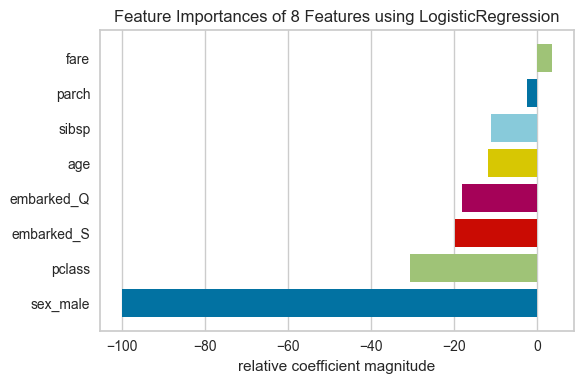

<Axes: title={'center': 'Feature Importances of 8 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [13]:
from yellowbrick.model_selection.importances import FeatureImportances
import matplotlib.pyplot as plt

# Crear una figura y ejes para el gráfico
fig, ax = plt.subplots(figsize=(6, 4))

# Crear una instancia de FeatureImportances con el modelo de regresión lineal (lr)
fi_viz = FeatureImportances(lr)

# Ajustar el modelo a los datos de entrada (X) y las etiquetas (y)
fi_viz.fit(X_train, y_train)

# Visualizar la importancia de las características
fi_viz.poof()

In [19]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds)

def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

[[4.03541657]]


# Naive Bayes